In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
houses = pd.read_csv("informations_households.csv")
daily = pd.read_csv("daily_dataset.csv")
acorn = pd.read_csv("acorn_details.csv", skiprows=0, encoding='latin1', sep=',')


In [4]:

#maski ograniczajace acord do istotnych kategorii
mask1 = acorn["MAIN CATEGORIES"] == "FINANCE" 
fin = acorn[mask1]
mask2 =  fin['CATEGORIES'] == 'Household Annual Income'
fin = fin[mask2]
columny = fin.columns[3:]

#zakladamy relatywnie biednych 0-40, bogatych 80-100+


fin=fin.reset_index(drop = True)
odp = fin[columny].transpose().idxmax()
# w ktorym acornie jest najwiecej osob dla kategorii relatywnie najbiedniejszych [0,1]
acorn_biedni = list(pd.unique(odp.iloc[[0,1]]))

# w ktorym acornie jest najwiecej osob dla kategorii relatywnie najbardziej bogatych [4,5]
acorn_bogaci = list(pd.unique(odp.iloc[[4,5]]))



#Stiwerdzamy na podstawie ze w zkaresie rocznych zarobkow 0-40k, najwiecej ludzi nalezy do acorn-N i L
#Stiwerdzamy na podstawie ze w zkaresie rocznych zarobkow 80-100+, najwiecej ludzi nalzey do acorn A
#W dalszej analizie skupimy sie na tych trzech zakresach traktujac acorn N i L tak samo.




Znajdujemy house ktore naleza do zidentyfikowanych acorn i laczymy je z danymi srednimi poboru energii

In [5]:
mask_rich = houses['Acorn'] == 'ACORN-A'

mask1_not1 = np.array(houses['Acorn'] == 'ACORN-N') 
mask1_not2 = np.array(houses['Acorn'] == 'ACORN-L')
mask_not = np.logical_or(mask1_not1,mask1_not2)


In [6]:
rich = houses[mask_rich]
notrich = houses[mask_not]

In [7]:
rich_mean = pd.merge(left = rich,right = daily, how = 'inner',on='LCLid')['energy_mean']
notrich_mean = pd.merge(left = notrich,right = daily, how = 'inner',on='LCLid')['energy_mean']

rich_mean= rich_mean.reset_index(drop = True)
notrich_mean = notrich_mean.reset_index(drop = True)


In [11]:
print('Ilosc bogatych: ', len(rich_mean))
print('Ilosc biednych: ', len(notrich_mean))

Ilosc bogatych:  93084
Ilosc biednych:  295960


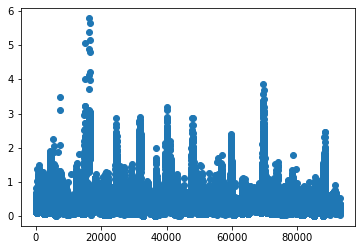

In [10]:
plt.scatter(range(len(rich_mean)),rich_mean)

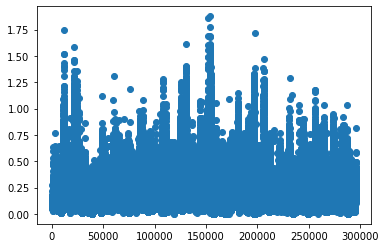

In [13]:
plt.scatter(range(len(notrich_mean)),notrich_mean)